# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


## Import Packages

In [187]:
import os
import regex as re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words("english")

In [223]:
import glob
import html
import string
import matplotlib

# Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.


In [189]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/drzag/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

## Function to Extract Followers into Dataframe

In [190]:
def follower_import(filenum):
    fol = []
    raw_file = os.listdir('C:/Users/drzag/twitter')[filenum]
    file = ('C:/Users/drzag/twitter/'+raw_file)
    fol = pd.read_csv(file, sep="\t", header=None)
    #CODE NOTE: "\t" was required to correctly read the file.
    fol.columns = ["name", "handle", "id_num", "loc", "date_joined", "followers", "friends", "desc"]
    fol['desc'] = fol['desc'].apply(str)
    fol.drop(fol[fol['desc'] == 'nan'].index, inplace = True)
    fol['desc_len'] = fol['desc'].str.len()
    return fol

print(os.listdir('C:/Users/drzag/twitter'))

['aboveandbeyond_followers.txt', 'didoofficial_followers.txt']


## Import Dido Follower Data

In [191]:
dido_fol = follower_import(1)  
dido_fol.describe().T
print(dido_fol.info())
dido_fol.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60699 entries, 0 to 100893
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         60686 non-null  object
 1   handle       60699 non-null  object
 2   id_num       60699 non-null  int64 
 3   loc          45836 non-null  object
 4   date_joined  60699 non-null  object
 5   followers    60699 non-null  int64 
 6   friends      60699 non-null  int64 
 7   desc         60699 non-null  object
 8   desc_len     60699 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.6+ MB
None


,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len
0,RenElDepre,ElRenirey,1368982010920898561,"Santiago, Chile",2021-03-08 17:48:50+00:00,10,195,Lo que me Apasiona 😇 Lo que me Divierte😎 Lo qu...,81
3,CrackinLeftF⚽⚽t,DavidMarcusBen1,1307948922191609857,NaN,2020-09-21 07:45:08+00:00,6,57,'Flawed Genuis',15
4,W.K BRIAN,WKBrian7,1483097247604609025,JINJA,2022-01-17 15:22:29+00:00,0,3,"SAXOPHONE PLAYER,GOSPEL MUSIC WRITER,SINGER AN...",56


## Import Above & Beyond Follower Data

In [192]:
ab_fol = follower_import(0)  
ab_fol.describe().T
print(ab_fol.info())
ab_fol.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 100889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         65098 non-null  object
 1   handle       65125 non-null  object
 2   id_num       65125 non-null  int64 
 3   loc          44805 non-null  object
 4   date_joined  65125 non-null  object
 5   followers    65125 non-null  int64 
 6   friends      65125 non-null  int64 
 7   desc         65125 non-null  object
 8   desc_len     65125 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 5.0+ MB
None


,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len
0,DjSpace.booty,djspace_booty,1568710404314124288,"Los Angeles, CA",2022-09-10 21:18:25+00:00,3,35,LA DJ with a passion for house music & a nice ...,50
5,Felipe Rodrigues Figueiredo,FelipeR87147318,1568656781945061381,"São José do Rio Preto, Brasil",2022-09-10 17:46:38+00:00,3,331,See Off,7
6,Warner Powers,itswarnerpowers,1568338123477721089,NaN,2022-09-09 20:38:49+00:00,1,54,DJ & Producer,13


### Import Dido Song Titles and Lyrics

In [193]:
# Define relative path to folder containing the text files

files_folder = "/users/drzag/lyrics/dido"
files = []
dido_files_df = pd.DataFrame()

# Create a dataframe list and concatenate

files = [pd.read_csv(file, delimiter='\t') for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
dido_files_df = pd.concat(files, axis = 1)

# EXTRACT TITLES TO NEW DF
dido_titles = []
dido_titles = dido_files_df.loc[1, :].values.tolist()
dido_titles_df = pd.DataFrame(dido_titles, columns = ['titles'])

# DELETE UNNEEDED ROWS
dido_files_df = dido_files_df.iloc[2: , : ]

### Import Above & Beyond Song Titles and Lyrics

In [194]:
# Define relative path to folder containing the text files

files_folder = "/users/drzag/lyrics/abovebeyond"
files = []
ab_files_df = pd.DataFrame()

# Create a dataframe list and concatenate

files = [pd.read_csv(file, delimiter='\t') for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
ab_files_df = pd.concat(files, axis = 1)

# EXTRACT TITLES ONLY
ab_titles = []
ab_titles = ab_files_df.loc[1, :].values.tolist()
ab_titles_df = pd.DataFrame(ab_titles, columns = ['titles'])

# DELETE UNNEEDED ROWS
ab_files_df = ab_files_df.iloc[2: , : ]

# DELETE DUPLICATE COLUMN
ab_files_df = ab_files_df.loc[:,~ab_files_df.columns.duplicated()]

# Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 

## Functions to Preprocess Text Cells to Tokens

In [195]:
def only_words(x):
    x = re.sub('[^a-z\s]', '', x.lower())
    x = [w for w in x.split() if w not in set(sw)]
    # USE THIS ONE FOR TOKENS
    return x
    # USE THIS ONE FOR STRING
    #return ' '.join(x)

def mod2_norm_tok(x):
    '''
    Now clean and tokenize your data. 
    Remove punctuation characters (available in the `punctuation` object in the `string` library)
    Split on whitespace
    Fold to lowercase
    Remove stopwords.
    '''
    #Remove punctuation characters
    x = x.translate(str.maketrans('', '', string.punctuation))
    #Fold to lowercase
    x = x.lower()
    # starts with (feat.                #a few lyric began with a line for other featured artists
    x = re.sub(r'^(feat).*[a-z]$', ' ', x)
    # is nan
    x = re.sub(r'(nan)', ' ', x)
    #Split on whitespace AND Remove stopwords
    x = [w for w in x.split() if w not in (set(sw))]
    # USE THIS ONE FOR TOKENS
    return x
    # USE THIS ONE FOR STRING
    #return ' '.join(x)
    
def leave_hashes(x):
    '''
    Now clean and tokenize your data. 
    Remove punctuation characters (available in the `punctuation` object in the `string` library)
    Split on whitespace
    Fold to lowercase
    Remove stopwords.
    '''
    #Remove punctuation characters
    x = x.translate(str.maketrans('', '', string.punctuation.replace("#","")))
    #Fold to lowercase
    x = x.lower()
    # starts with (feat.                #a few lyric began with a line for other featured artists
    x = re.sub(r'^(feat).*[a-z]$', ' ', x)
    # is nan
    x = re.sub(r'(nan)', ' ', x)
    #Split on whitespace AND Remove stopwords
    x = [w for w in x.split() if w not in (set(sw))]
    # USE THIS ONE FOR TOKENS
    return x
    # USE THIS ONE FOR STRING
    #return ' '.join(x)
    
def custom_clean(x):
    # convert html escapes like &amp; to characters.
    x = html.unescape(x) 
    # tags like <tab>
    x = re.sub(r'<[^<>]*>', ' ', x)
    # markdown URLs like [Some text](https://....)
    x = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', x)
    # text or code in brackets like [0]
    x = re.sub(r'\[[^\[\]]*\]', ' ', x)
    # standalone sequences of specials, matches &# but not #cool
    x = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', x)
    # standalone sequences of hyphens like --- or ==
    x = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', x)
    # sequences of white spaces
    x = re.sub(r'\s+', ' ', x)
    x = [w for w in x.split() if w not in set(sw)]      #Creates a LIST of tokens
    #return x.strip()                                    #Removes spaces at beginning and end of string
    return x                                            #RETURN for list of tokens
    #return ' '.join(x)                                  #RETURN for single string

## Insert Newly Processed Text into Dido DF

In [202]:
#dido_fol['only_words'] = dido_fol['desc'].apply(only_words)
dido_fol['assignment'] = dido_fol['desc'].apply(mod2_norm_tok)
#dido_fol['custom'] = dido_fol['desc'].apply(custom_clean)
dido_fol['with_hashes'] = dido_fol['desc'].apply(leave_hashes)

## Insert Newly Processed Text into Above & Beyond DF

In [203]:
#ab_fol['only_words'] = ab_fol['desc'].apply(only_words)
ab_fol['assignment'] = ab_fol['desc'].apply(mod2_norm_tok)
#ab_fol['custom'] = ab_fol['desc'].apply(custom_clean)
ab_fol['with_hashes'] = ab_fol['desc'].apply(leave_hashes)

## Insert New Column for Processed Dido Titles

In [204]:
dido_titles_df['only_words'] = dido_titles_df['titles'].apply(only_words)
dido_titles_df['assignment'] = dido_titles_df['titles'].apply(mod2_norm_tok)
dido_titles_df['custom'] = dido_titles_df['titles'].apply(custom_clean)

## Insert New Column for Processed Above & Beyond Titles

In [205]:
ab_titles_df['only_words'] = ab_titles_df['titles'].apply(only_words)
ab_titles_df['assignment'] = ab_titles_df['titles'].apply(mod2_norm_tok)
ab_titles_df['custom'] = ab_titles_df['titles'].apply(custom_clean)

## Process Dido Lyrics into Tokens

In [206]:
for column in dido_files_df:
    dido_files_df[column] = dido_files_df[column].apply(str)
    dido_files_df[column] = dido_files_df[column].apply(mod2_norm_tok)
dido_files_df.head(5)

,All I See lyrics,All You Want lyrics,Blackbird lyrics,Burnin' Love lyrics,Cards lyrics,Chances lyrics,Closer lyrics,Clouds Like Islands lyrics,Day Before We Went To War lyrics,Don't Believe In Love lyrics,...,This Land Is Mine lyrics,Those Were The Days lyrics,Together lyrics,Us 2 Little Gods lyrics,Walking By lyrics,What Am I Doing Here lyrics,White Flag lyrics,Who Makes You Feel lyrics,Worthless lyrics,You Don't Need A God lyrics
2,[],"[id, like, watch, sleep, night]","[put, coffee, cup, milk, filled]","[found, peace]","[oh, baby, baby, baby]",[today],"[leave, taxi, waiting]","[pine, forests, clouds, like, islands]","[pictures, wall]","[wanna, go, bed]",...,"[behind, walls, hear, song]",[kids],"[ladies, gentlemen]","[walking, home, burnt, red]","[keep, locked, keep, shut]","[theres, empty, seat, next, everywhere, go]","[know, think, shouldnt, still, love]","[dont, touch, way, used]","[know, came]","[hear, music]"
3,"[thought, done, packed, bags, walked, light]","[hear, breathe, side]","[added, sugar, never, knew, liked, like]","[lies, ive, told]","[happened, days]","[wake, watch, tv]","[turn, close, door]","[spanish, boys, mopeds]","[sand, lying, floor]","[arms, around]",...,"[oh, sweet, words]","[wed, know]",[begun],"[sticky, thin, said]","[mind, still, roams, free]","[even, plane, sofa, back, home]",[tell],"[dont, call, write, im, away]","[know, youll, leave]","[notes, passing, car]"
4,"[picked, books, thought, closed, door, behind]","[though, sleep, leaves, behind]","[took, coat, hook, scarf, hat]","[im, hurt, blows, get, withheld]","[doors, always, open]","[another, wasted, day]","[sit, back, sitting]","[vodka, shots, charcoal, fires]","[bed, upstairs, still, unmade]",[wake],...,"[music, play, lights, world]",[live],"[dont, need, news]","[let, us, go, woods]","[keep, caged]","[lifes, short, time]","[didnt, say, well, id, still, felt]","[dont, make, love, often]","[came, heart]",[take]
5,"[handed, back, keys, thought, free]","[theres, nowhere, id, rather]","[put, key, said, wont, needing]","[sharper, get, cut]","[music, always, played]","[thats, alright]","[little, closer]","[palm, trees, heat, asphalt]","[dust, float, light]",[pretend],...,"[sweetest, iâx80x99ve, heard]","[love, forever]","[need, weather]","[careful, said]","[tell, quiet]","[could, spent, two]","[wheres, sense]","[couldnt, wait, waits, usually, goes, away]",[lost],"[heart, opening, speed]"
6,"[shame, dirt, surprises, wait]","[bed, oh, cold]","[turned, smiled, explained]","[harder, get, held]","[remember, darling]","[shadows, turn, clouds]","[look, serious]","[larks, lizards, wasps, grass]","[people, left]","[im, still, sleeping]",...,"[could, iâx80x99ve, touched, turned]",[blind],"[tell, time]","[us, 2, little, gods, world, feet]","[remember, everything]","[ive, seen, ive, held]","[promise, im, trying, make, life, harder]","[listen, think, say]","[wont, stop]",[somewhere]


## Process Above & Beyond Lyrics into Tokens

In [207]:
for column in ab_files_df:
    ab_files_df[column] = ab_files_df[column].apply(str)
    ab_files_df[column] = ab_files_df[column].apply(mod2_norm_tok)
ab_files_df.head(5)

,Air For Life lyrics,Alchemy lyrics,All Over The World lyrics,Almost Home lyrics,Alone Tonight lyrics,Alright Now lyrics,Alright Now (Above & Beyond Club Mix) lyrics,Always lyrics,Another Chance lyrics,Bittersweet & Blue lyrics,...,Sticky Fingers (Acoustic Version) lyrics,Sun & Moon lyrics,Sweetest Heart lyrics,Thing Called Love lyrics,Tightrope lyrics,Treasure lyrics,We're All We Need lyrics,With Your Hope lyrics,You Gotta Go lyrics,You Got To Go lyrics
2,"[need, air, lifewe, breath]",[],[],[],"[slipping, sideways, silver, stars, collide]",[],"[justine, suissa]",[],"[ask, another, chance]",[],...,"[painted, picture, want]",[],[],[],"[youre, running, tightrope]",[],[],"[connected, talk]","[dream, little, dreamer]",[]
3,"[need, air, lifenow, soul]","[words, speak]","[maybe, waited, long]",[made],"[fade, away, like, love, died]","[ive, lived, little]","[ive, lived, little]","[maybe, hurting]",[ask],"[ive, got, photograph]",...,[wanted],"[raining, pouring]","[sweetest, heart]","[time, place]","[theres, empty, sky]","[treasure, measured, units, love]","[tell, place, like, go]","[singing, forest, ice]",[begins],"[dream, little, dreamer, begins]"
4,"[need, air, forever]","[foreign, land]","[maybe, got, caught, storm]","[ways, deceive]","[nowhere, universe, hide, tonight]","[ive, loved, lot]","[ive, loved, lot]","[maybe, give, little, time]","[ask, another, chance]","[kept, box, memories]",...,"[theres, something]","[black, sky, falling]",[],"[fear, inside]","[whered, go]","[means, may, find, rich]","[say, reach, seize, sorrow]","[slow, motion, moment, tumbling]","[dream, little, dreamer]","[move, feet, feel, sweet]"
5,[],"[youre, telling, birds, dont, fly]","[sent, incomplete]","[bind, soul]","[ive, wrestled, angels, life]",[lost],[lost],"[day, really, need]",[ask],"[feel, breakable]",...,"[would, like]","[cold, tonight]",[],"[witty, line, save, face]","[please, anyone, know]","[beyond, wildest, dreams]","[always, mean, act, say]","[till, lost, inside, sound]",[begins],"[dream, little, dreamer, follow, signs]"
6,"[need, air, whateverthat]",[love],"[lonely, call, haunting]","[waiting, found]","[always, halos, wings, keep, blind]","[tied, dreams]","[tied, dreams, lovers, knot]","[take, arms, say]","[know, time, come]","[take, look, eyes]",...,"[get, sticky, fingers, head]","[gave, answer]",[],"[parachute, pride]","[youre, running, tightrope]","[beyond, wildest, dreams]","[come, oh, darling, hurry, hurry, lets, go]","[worst, fall]","[move, feet]","[got, gather, need]"


#### Attempt to Load Tokens into One Large List: Too Slow

In [25]:
################ Loading one giant list takes WAYYYYY to long
#text = []
#for i in range(len(ab_fol)):
#    text = text + ab_fol['clean_desc_tok'][i]
#    print(i)
#text

#len(text)
#counter = Counter(text)
#print(counter)

#freq_df = pd.DataFrame.from_dict(counter, orient = 'index', columns = ['freq'])
#freq_df.index.name = 'token'
#freq_df = freq_df.sort_values('freq', ascending = False)
#freq_df

## Function: Convert List of Tokens to Stats

In [214]:
###########################################
###########################################
#If not done, load text Token Lists into DataFrame Cells: One Token List per Cell:
#Example for one line of text:
#text = """here is some example text with other example text here in this text""".split()
#text_df = pd.DataFrame(data={'desc': [text]})

def descriptive_stats(df_col, top_x_tokens = 10, verbose=True) :
    counter = Counter()
    df_col.map(counter.update)
    num_tokens = sum(counter.values())
    num_unique_tokens = len(counter.keys())
    num_characters=0
    for key, value in counter.items():
        char = (len(key))*value
        num_characters = num_characters + char
    lexical_diversity = num_unique_tokens/num_tokens

    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The ten most common tokens are:")
        print(counter.most_common(top_x_tokens))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

def descriptive_stats2(df_col, top_x_tokens = 10, verbose=True) :
    song_counter = Counter()
    df_col.map(song_counter.update)
    song_length.append(sum(song_counter.values()))
    
    df_col.map(counter.update)
    num_tokens = sum(counter.values())
    num_unique_tokens = len(counter.keys())
    num_characters=0
    for key, value in counter.items():
        char = (len(key))*value
        num_characters = num_characters + char
    lexical_diversity = num_unique_tokens/num_tokens

    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The ten most common tokens are:")
        common = counter.most_common(top_x_tokens)
        print(common)
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

# Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

### Dido Followers -- Function Call

In [209]:
descriptive_stats(dido_fol['assignment'], top_x_tokens = 20, verbose=True)

There are 509393 tokens in the data.
There are 114085 unique tokens in the data.
There are 3001470 characters in the data.
The lexical diversity is 0.224 in the data.
The ten most common tokens are:
[('de', 7903), ('love', 4649), ('la', 4499), ('music', 4290), ('en', 3153), ('life', 2992), ('im', 2774), ('que', 2574), ('el', 2148), ('fan', 1970), ('lover', 1614), ('follow', 1343), ('mi', 1324), ('like', 1308), ('live', 1280), ('e', 1194), ('un', 1183), ('es', 1157), ('los', 1149), ('world', 1139)]


[509393, 114085, 0.22396263788469806, 3001470]

### Above & Beyond Followers -- Function Call

In [210]:
descriptive_stats(ab_fol['assignment'], top_x_tokens = 20, verbose=True)

There are 466536 tokens in the data.
There are 112024 unique tokens in the data.
There are 2796392 characters in the data.
The lexical diversity is 0.240 in the data.
The ten most common tokens are:
[('music', 7029), ('de', 4062), ('dj', 3416), ('love', 2936), ('la', 2812), ('life', 2577), ('producer', 2543), ('trance', 2028), ('•', 1970), ('im', 1672), ('house', 1567), ('en', 1558), ('edm', 1461), ('que', 1423), ('lover', 1305), ('like', 1274), ('el', 1241), ('fan', 1171), ('música', 1108), ('live', 1060)]


[466536, 112024, 0.24011866179673166, 2796392]

## Convert List of Tokens to Stats: Text Code

In [211]:
text = """here is some example text with other example text here in this text""".split()
text_df = pd.DataFrame(data={'desc': [text]})

descriptive_stats(text_df['desc'], top_x_tokens = 20, verbose=True)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The ten most common tokens are:
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1), ('with', 1), ('other', 1), ('in', 1), ('this', 1)]


[13, 9, 0.6923076923076923, 55]

In [212]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text_df['desc'], verbose=True)[0] == 13)
assert(descriptive_stats(text_df['desc'], verbose=False)[1] == 9)
assert(abs(descriptive_stats(text_df['desc'], verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text_df['desc'], verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The ten most common tokens are:
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1), ('with', 1), ('other', 1), ('in', 1), ('this', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: The assert statement will throw an error is the assertion, in this case a comparative statement, is not True.  Since there were no errors thrown, the function is returning the expected values.

## Dido Lyrics -- Function Call

In [215]:
counter=Counter()
song_length = []
for column in dido_files_df:
    descriptive_stats2(dido_files_df[column], top_x_tokens = 20, verbose=True) 
dido_song_length = song_length

There are 198 tokens in the data.
There are 145 unique tokens in the data.
There are 1003 characters in the data.
The lexical diversity is 0.732 in the data.
The ten most common tokens are:
[('youre', 8), ('see', 8), ('carry', 6), ('thought', 5), ('back', 5), ('need', 4), ('theyre', 4), ('would', 3), ('im', 3), ('could', 3), ('find', 3), ('without', 3), ('dont', 3), ('gone', 2), ('memories', 2), ('still', 2), ('fly', 2), ('right', 2), ('change', 2), ('wrong', 2)]
There are 294 tokens in the data.
There are 184 unique tokens in the data.
There are 1435 characters in the data.
The lexical diversity is 0.626 in the data.
The ten most common tokens are:
[('want', 8), ('youre', 8), ('see', 8), ('need', 7), ('carry', 6), ('thought', 5), ('back', 5), ('right', 5), ('sleep', 5), ('room', 4), ('id', 4), ('would', 4), ('could', 4), ('theyre', 4), ('night', 4), ('gone', 3), ('im', 3), ('like', 3), ('find', 3), ('without', 3)]
There are 398 tokens in the data.
There are 240 unique tokens in the da

There are 7854 tokens in the data.
There are 1389 unique tokens in the data.
There are 37282 characters in the data.
The lexical diversity is 0.177 in the data.
The ten most common tokens are:
[('love', 162), ('dont', 152), ('im', 122), ('see', 108), ('ive', 87), ('youre', 84), ('home', 82), ('go', 75), ('oh', 73), ('time', 70), ('let', 70), ('ill', 64), ('day', 64), ('say', 62), ('know', 59), ('feel', 59), ('want', 58), ('away', 57), ('nothing', 57), ('back', 55)]
There are 7988 tokens in the data.
There are 1392 unique tokens in the data.
There are 37978 characters in the data.
The lexical diversity is 0.174 in the data.
The ten most common tokens are:
[('love', 164), ('dont', 152), ('im', 122), ('see', 108), ('ive', 87), ('never', 85), ('youre', 84), ('home', 82), ('go', 75), ('oh', 73), ('time', 70), ('let', 70), ('enough', 66), ('ill', 64), ('day', 64), ('say', 62), ('know', 60), ('feel', 59), ('want', 58), ('away', 57)]
There are 8061 tokens in the data.
There are 1396 unique tok

## Above & Beyond Lyrics -- Function Call

In [216]:
counter=Counter()
song_length = []
for column in ab_files_df:
    descriptive_stats2(ab_files_df[column], top_x_tokens = 20, verbose=True) 
ab_song_length = song_length

There are 40 tokens in the data.
There are 8 unique tokens in the data.
There are 206 characters in the data.
The lexical diversity is 0.200 in the data.
The ten most common tokens are:
[('need', 12), ('air', 12), ('forever', 4), ('whateverthat', 4), ('lifewe', 2), ('breath', 2), ('lifenow', 2), ('soul', 2)]
There are 86 tokens in the data.
There are 46 unique tokens in the data.
There are 439 characters in the data.
The lexical diversity is 0.535 in the data.
The ten most common tokens are:
[('need', 12), ('air', 12), ('love', 5), ('forever', 4), ('whateverthat', 4), ('dont', 3), ('lifewe', 2), ('breath', 2), ('lifenow', 2), ('soul', 2), ('alchemy', 2), ('take', 2), ('words', 1), ('speak', 1), ('foreign', 1), ('land', 1), ('youre', 1), ('telling', 1), ('birds', 1), ('fly', 1)]
There are 132 tokens in the data.
There are 71 unique tokens in the data.
There are 667 characters in the data.
The lexical diversity is 0.538 in the data.
The ten most common tokens are:
[('need', 12), ('air', 

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Leaving in stopwords would not eliminate words like "the" "a" and "an" and these would likely appear in the list of the most frequent words.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I would have expected a bit more diversity, but the same words: "I'm", "love", "know", "you're", "get", "don't", "need", "go" and so on dominate the top words.  Even though I know Above and Beyond is a Trance/DJ band, and Dido is Pop/Solo Artist performer, I could not have distingusihed them from this analysis.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [39]:
help(emoji)

Help on package emoji:

NAME
    emoji

DESCRIPTION
    emoji for Python
    ~~~~~~~~~~~~~~~~
    
    emoji terminal output for Python.
    
        >>> import emoji
        >>> print(emoji.emojize('Python is :thumbsup:', language='alias'))
        Python is 👍
        >>> print(emoji.emojize('Python is :thumbs_up:'))
        Python is 👍

PACKAGE CONTENTS
    core
    unicode_codes (package)

FUNCTIONS
    demojize(string, delimiters=(':', ':'), language='en', version=None, handle_version=None)
        Replace Unicode emoji in a string with emoji shortcodes. Useful for storage.
            >>> import emoji
            >>> print(emoji.emojize("Python is fun :thumbs_up:"))
            Python is fun 👍
            >>> print(emoji.demojize(u"Python is fun 👍"))
            Python is fun :thumbs_up:
            >>> print(emoji.demojize(u"Unicode is tricky 😯", delimiters=("__", "__")))
            Unicode is tricky __hushed_face__
        
        :param string: String contains Unicode charact

In [173]:
print(emoji.emojize("Python is fun :thumbs_up:"))
from emoji import is_emoji
print(is_emoji('p'))

Python is fun 👍
False


In [174]:
#def is_emoji(s):
#    return(s in emoji.UNICODE_EMOJI['en'])

print(is_emoji("❤️"))
print(is_emoji(":-)"))

assert(is_emoji("❤️"))
assert(is_emoji(":-)"))

True
False


AssertionError: 

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [175]:
counter = Counter()
dido_fol['assignment'].map(counter.update)
num=0
for key, value in counter.most_common():
    if num <11:
        if is_emoji(key) is True:
            print(key, value)
            num+=1
    else:
        break

♥ 561
❤️ 451
❤ 302
🏳️‍🌈 241
🎶 179
✨ 162
💙 145
🇲🇽 128
💜 103
🌈 98
🇬🇧 87


In [176]:
counter = Counter()
ab_fol['assignment'].map(counter.update)
num=0
for key, value in counter.most_common():
    if num <11:
        if is_emoji(key) is True:
            print(key, value)
            num+=1
    else:
        break

❤️ 507
🎶 393
🎧 368
✨ 333
🇲🇽 325
🏳️‍🌈 313
❤ 266
😎 249
🖤 193
💜 175
💙 172


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [177]:
counter = Counter()
dido_fol['with_hashes'].map(counter.update)
num=0
for key, value in counter.most_common():
    if num <11:
        if key.startswith('#'):
            print(key, value)
            num+=1
    else:
        break

#music 126
# 80
#trancefamily 59
#blacklivesmatter 58
#1 44
#mufc 43
#ynwa 40
#blm 38
#love 37
#art 34
#trance 34


In [178]:
counter = Counter()
ab_fol['with_hashes'].map(counter.update)
num=0
for key, value in counter.most_common():
    if num <11:
        if key.startswith('#'):
            print(key, value)
            num+=1
    else:
        break

#trance 187
#edm 178
#music 123
#trancefamily 108
#bitcoin 107
#techno 106
#blacklivesmatter 94
#dj 85
#blm 81
# 79
#house 78


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [184]:
counter = Counter()
dido_titles_df['assignment'].map(counter.update)
num=0
for key, value in counter.most_common():
    if num <6:
        print(key, value)
        num+=1
    else:
        break

love 7
day 4
dont 4
see 3
want 2
home 2


In [185]:
counter = Counter()
ab_titles_df['assignment'].map(counter.update)
num=0
for key, value in counter.most_common():
    if num <6:
        print(key, value)
        num+=1
    else:
        break

love 8
home 3
good 3
alone 2
tonight 2
alright 2


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


[198, 96, 104, 102, 78, 79, 130, 83, 121, 122, 121, 104, 124, 133, 111, 91, 172, 123, 128, 111, 154, 114, 92, 132, 98, 96, 47, 40, 100, 83, 89, 114, 90, 113, 88, 103, 156, 92, 210, 138, 89, 33, 103, 55, 102, 119, 104, 113, 27, 45, 142, 100, 71, 162, 141, 117, 103, 123, 156, 112, 83, 92, 150, 142, 100, 109, 75, 107, 109, 47, 97, 95, 61, 90, 134, 73, 90, 131, 99, 112, 120, 71, 84]


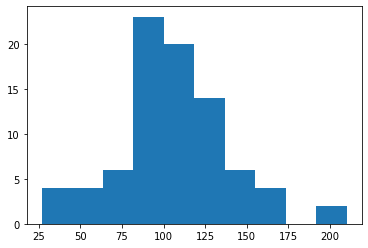

In [225]:
from matplotlib import pyplot as plt

print(dido_song_length)
plt.hist(dido_song_length, 10)
plt.show()

[40, 46, 46, 112, 138, 100, 121, 96, 80, 145, 174, 107, 127, 79, 146, 87, 51, 73, 122, 57, 100, 129, 20, 57, 34, 37, 77, 91, 42, 60, 99, 21, 50, 76, 98, 86, 96, 103, 71, 122, 89, 66, 146, 83, 61, 81, 109, 55, 97, 94, 95, 40, 88, 103, 73, 2, 89, 73, 40, 86, 35, 115, 40]


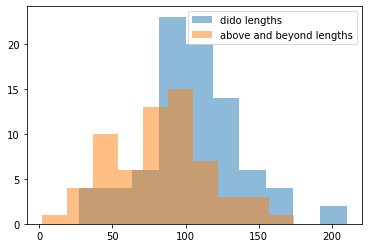

In [236]:
print(ab_song_length)
plt.hist(dido_song_length, alpha=0.5, bins=10, label = 'dido lengths')
plt.hist(ab_song_length, alpha=0.5, bins=10, label = 'above and beyond lengths')
plt.legend()
plt.show()

In [ ]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: One or more whitespace characters


In [ ]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [ ]:
# Your lyric length comparison chart here. 